### part6 - Reinforcement Learning - Upper Confidence Bound(UCB)

### How do I find out best one...?

- http://sanghyukchun.github.io/96/
- https://arxiv.org/pdf/1510.00757.pdf

![alt text](UCB_3.png)
![alt text](UCB_4.png)
![alt text](UCB_5.png)
![alt text](UCB_6.png)
![alt text](UCB_7.png)
![alt text](UCB_8.png)
![alt text](UCB_9.png)
![alt text](UCB_10.png)
![alt text](UCB_11.png)

### Code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [5]:
# Importing the dataset

dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head(10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


### Random selection

In [13]:
# Implementing Random Selection

import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

In [14]:
ads_selected[0:10]

[1, 0, 7, 9, 4, 6, 6, 5, 0, 9]

In [15]:
total_reward

1257

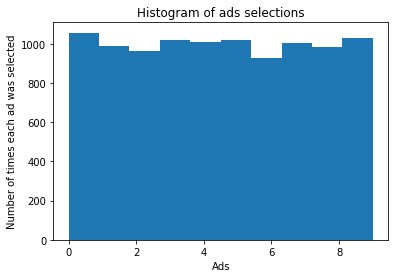

In [16]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

### UCB

In [22]:
# step 1

N = 10000
d = 10

numbers_of_selections = [0 for i in range(d)]
sums_of_rewards = [0 for i in range(d)]


# step 2
# N : total round
# d : numbers of ads

import math

N = 10000
d = 10
ads_selected = []
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
            
        if max_upper_bound < upper_bound:
            max_upper_bound = upper_bound
            ad = i

    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

In [23]:
total_reward

2178

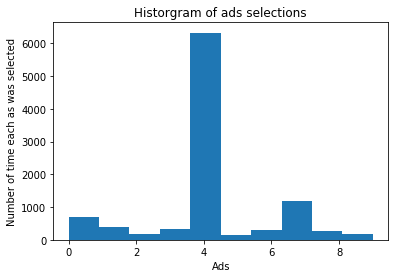

In [30]:
# visualising the results

plt.hist(ads_selected)
plt.title("Historgram of ads selections")
plt.xlabel("Ads")
plt.ylabel("Number of time each as was selected")
plt.show()